In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load, dump
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [171]:
df = load('../joblib_files/updated_final_df.joblib')

In [172]:
column_stats = df.describe().loc[['mean', 'min', 'max']]
column_stats.loc['absolute_mean'] = df.abs().mean()
column_stats.loc['median'] = df.median()
pd.options.display.float_format = '{:,.6f}'.format
#column_stats.T

In [173]:
#dump(column_stats, 'joblib_files/df_stats')

In [174]:
df['Hurricanes_Binary'] = df['Hurricanes'].apply(lambda x: 1 if x > 0 else 0)

In [175]:
df.columns

Index(['Year', 'Annual_Cyclones', 'Sahel_Annual', 'AMO_Annual', 'ENSO_Annual',
       'TEMP_Annual', 'precip', 'Conus_temp', 'NE_temp', 'nao_sst',
       'nta_index', 'TNA_sst', 'AMM_sst', 'Nina_index', 'TSA_index',
       'NAO_Jones', 'rh_value', 'NJ_precip_y', 'Hurricanes', 'trop_pressure',
       'precip_water', 'Off_Coast_Pressure', 'height_y', 'geo_height_offcoast',
       'wind_value', 'Cyclones_Binary', 'Meridia_slp', 'Bermuda_slp',
       'Charleston_slp', 'Nassau_slp', 'HADCRUT_Anomaly', 'Hurricanes_Binary'],
      dtype='object')

In [176]:
df_imputer = df[['AMO_Annual', 'Nassau_slp', 'TNA_sst', 'AMM_sst', 'rh_value', 'Charleston_slp', 'Bermuda_slp', 'Meridia_slp']]
mice_imputer = IterativeImputer(random_state=42)
df_imputer = pd.DataFrame(mice_imputer.fit_transform(df_imputer), columns=df_imputer.columns)
df_imputer = pd.DataFrame(mice_imputer.transform(df_imputer), columns=df_imputer.columns)
df_imputer['Year'] = df['Year']

In [177]:
df_cleaned = df[['Year', 'Hurricanes_Binary']]
df_cleaned = df_cleaned.merge(df_imputer, on='Year')
df_cleaned.set_index('Year', inplace=True)

In [178]:
correlation_matrix = df.corr()

In [179]:
df_cleaned.columns

Index(['Hurricanes_Binary', 'AMO_Annual', 'Nassau_slp', 'TNA_sst', 'AMM_sst',
       'rh_value', 'Charleston_slp', 'Bermuda_slp', 'Meridia_slp'],
      dtype='object')

In [225]:
# Define the features and target
X = df_cleaned.drop(columns=['Hurricanes_Binary', 'rh_value', 'AMM_sst', 'TNA_sst', 'AMO_Annual', 'Bermuda_slp'])
y = df_cleaned['Hurricanes_Binary']

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, shuffle=True, stratify=y, random_state=42)

# Initialize and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=None, 
                                       min_samples_leaf=1)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf_classifier = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf_classifier)
precision = precision_score(y_test, y_pred_rf_classifier, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_rf_classifier, average='weighted')
f1 = f1_score(y_test, y_pred_rf_classifier, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_rf_classifier)

accuracy, precision, recall, f1, conf_matrix

(0.8235294117647058,
 0.8019607843137254,
 0.8235294117647058,
 0.8089249492900609,
 array([[13,  1],
        [ 2,  1]]))

- True Positives: 12 (correctly predicted cyclones)
- True Negatives: 1 (correctly predicted no cyclones)
- False Positives: 2 (incorrectly predicted cyclones)
- False Negatives: 0 (missed cyclones)

In [254]:
#dump(rf_classifier, '../models/rf_model.joblib')

['../models/rf_model.joblib']

rf classifier = Nassau_slp	Charleston_slp	Meridia_slp

In [264]:
X_test

,Nassau_slp,Charleston_slp,Meridia_slp
Year,,,
1996,0.302581,-1.120860,-3.432473
1980,0.002581,-0.020860,1.067527
1965,-0.230753,0.212473,0.234194
2001,1.269247,0.545806,1.267527
1960,-0.197419,-0.454194,-1.999140
2011,-0.278633,-0.758646,-0.482414
2021,0.298792,0.016282,0.145503
1979,0.002581,-1.187527,-0.665806
1995,-0.497419,-2.154194,-2.699140


In [271]:
df_cleaned

,Hurricanes_Binary,AMO_Annual,Nassau_slp,TNA_sst,AMM_sst,rh_value,Charleston_slp,Bermuda_slp,Meridia_slp
Year,,,,,,,,,
1950,1,-0.023750,-1.264086,-0.142000,0.846000,50.404000,-1.087527,-1.053978,-1.265806
1951,1,0.187333,-0.364086,0.204000,1.338000,41.816000,-0.454194,0.246022,-0.765806
1952,1,0.278583,-0.697419,0.248000,2.398000,47.056000,-0.120860,0.346022,0.234194
1953,0,0.247417,-0.030753,0.182000,1.258000,44.510000,-0.454194,0.112688,-0.099140
1954,0,0.025750,0.635914,-0.166000,-0.442000,44.732000,-0.120860,0.446022,0.900860
...,...,...,...,...,...,...,...,...,...
2018,0,0.033500,0.454255,-0.012000,-2.470000,39.858000,0.355359,0.165040,0.332603
2019,1,0.139083,-0.110581,0.420000,0.684000,42.053000,-0.520704,0.085724,-0.326804
2020,0,0.268167,-0.202234,0.618000,1.178000,42.212000,-0.714978,0.065195,-0.450647


In [268]:
rf_classifier.predict([[-1.26, -1.08, -1.4]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [263]:
df_cleaned[['Nassau_slp', 'Charleston_slp', 'Meridia_slp']].describe()

,Nassau_slp,Charleston_slp,Meridia_slp
count,73.000000,73.000000,73.000000
mean,0.090707,-0.209214,0.005723
std,0.684273,0.879374,1.009278
min,-1.464086,-2.487527,-3.432473
25%,-0.278633,-0.787527,-0.482414
50%,0.045539,-0.198379,-0.018940
75%,0.369247,0.279140,0.800860
max,2.069247,1.979140,1.834194


In [258]:
X_test

,Nassau_slp,Charleston_slp,Meridia_slp
Year,,,
1996,0.302581,-1.120860,-3.432473
1980,0.002581,-0.020860,1.067527
1965,-0.230753,0.212473,0.234194
2001,1.269247,0.545806,1.267527
1960,-0.197419,-0.454194,-1.999140
2011,-0.278633,-0.758646,-0.482414
2021,0.298792,0.016282,0.145503
1979,0.002581,-1.187527,-0.665806
1995,-0.497419,-2.154194,-2.699140


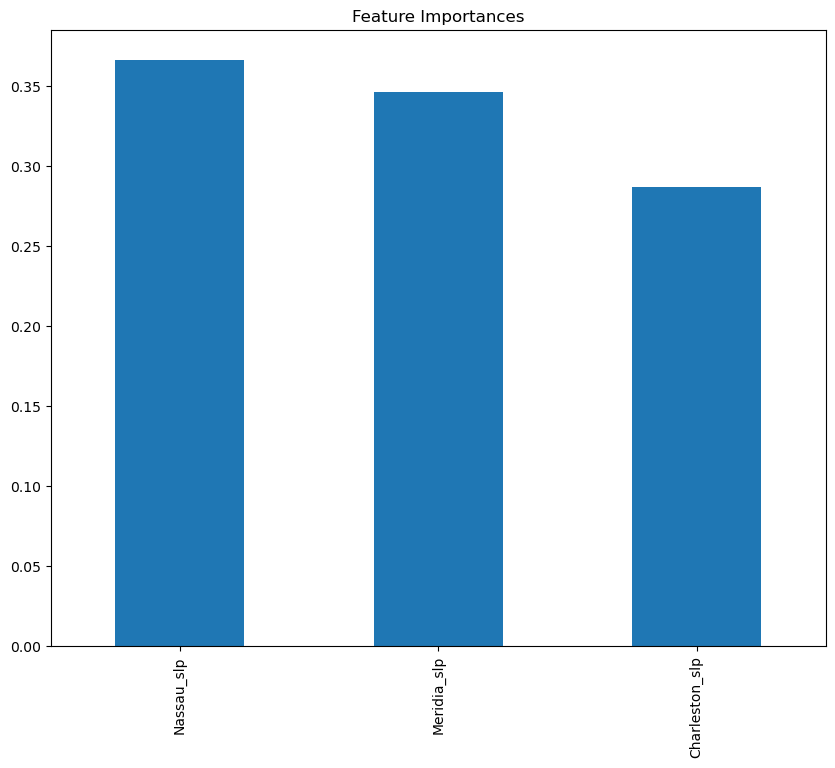

In [229]:
feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

In [249]:
from sklearn.metrics import precision_score, make_scorer
# Set up k-fold cross-validation
kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=40)
precision_scorer = make_scorer(precision_score, zero_division=0)

# Perform cross-validation and compute metrics
accuracy_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring=precision_scorer)
recall_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring='recall')
f1_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring='f1')

# Display the metrics
accuracy_mean = accuracy_scores.mean()
precision_mean = precision_scores.mean()
recall_mean = recall_scores.mean()
f1_mean = f1_scores.mean()

accuracy_mean, precision_mean, recall_mean, f1_mean

(0.8494152046783626,
 0.8541666666666666,
 0.47916666666666663,
 0.5333333333333333)

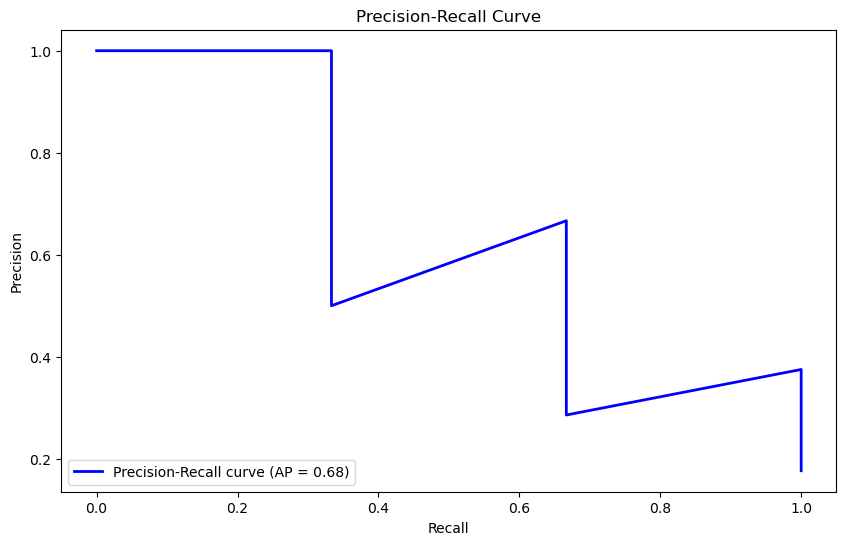

In [252]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()



In [807]:
X_scaled = scaler.fit_transform(X)


kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=40)


accuracy_scores = cross_val_score(rf_classifier, X_scaled, y, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(rf_classifier, X_scaled, y, cv=kf, scoring='precision')
recall_scores = cross_val_score(rf_classifier, X_scaled, y, cv=kf, scoring='recall')
f1_scores = cross_val_score(rf_classifier, X_scaled, y, cv=kf, scoring='f1')


accuracy_mean = accuracy_scores.mean()
precision_mean = precision_scores.mean()
recall_mean = recall_scores.mean()
f1_mean = f1_scores.mean()

accuracy_mean, precision_mean, recall_mean, f1_mean

(0.6978228228228228,
 0.6877705627705628,
 0.9130434782608696,
 0.7984749455337692)

In [780]:
# Manually defined smaller grid
param_grid = {
    'n_estimators': [150],
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

# Function to train and evaluate the model with given hyperparameters
def evaluate_rf(params):
    rf_classifier2 = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        max_features=params['max_features'],
        random_state=42
    )
    rf_classifier2.fit(X_train2, y_train2)
    y_pred = rf_classifier2.predict(X_test2)
    accuracy2 = accuracy_score(y_test2, y_pred)
    precision2 = precision_score(y_test2, y_pred)
    recall2 = recall_score(y_test2, y_pred)
    f1_2 = f1_score(y_test2, y_pred)
    return accuracy2, precision2, recall2, f1_2

# Prepare the data and split into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

# Iterate over the manually defined grid
results = []
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for min_samples_split in param_grid['min_samples_split']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                for max_features in param_grid['max_features']:
                    params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'max_features': max_features
                    }
                    metrics = evaluate_rf(params)
                    results.append((params, metrics))

# Find the best hyperparameters based on F1 score
best_params, best_metrics = max(results, key=lambda item: item[1][3])
best_params, best_metrics



({'n_estimators': 150,
  'max_depth': 20,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_features': 'sqrt'},
 (0.8, 0.8461538461538461, 0.9166666666666666, 0.8799999999999999))

- n_estimators 500 = .8, .85, .92, .88
- n_estimators 200 = .87, .86, 1, .92

In [781]:
best_rf_classifier = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)
best_rf_classifier.fit(X_train2, y_train2)

# Get the predicted probabilities for the test set
y_pred_prob = best_rf_classifier.predict_proba(X_test2)[:, 1]

In [782]:
y_pred_rf_classifier2 = best_rf_classifier.predict(X_test)
conf_matrix3 = confusion_matrix(y_test, y_pred_rf_classifier2)
conf_matrix3

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([[ 1,  2],
       [ 1, 11]])

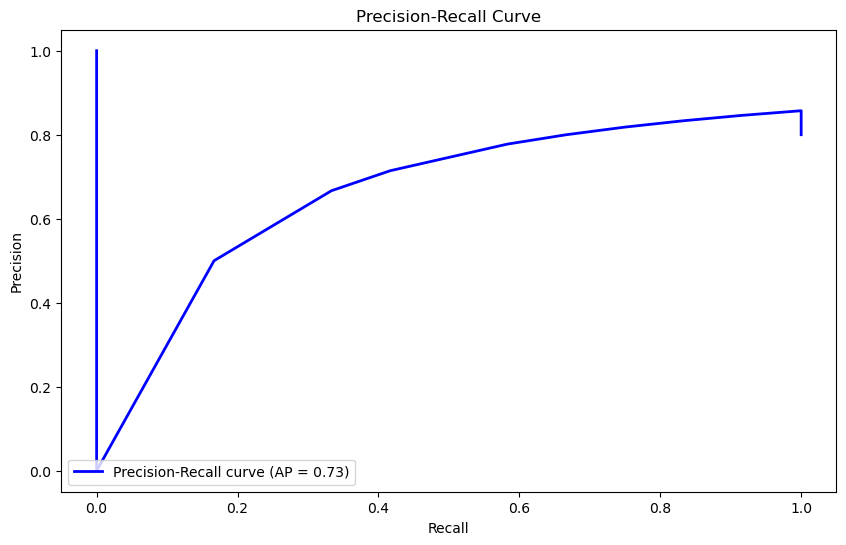

In [783]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve and average precision
precision, recall, _ = precision_recall_curve(y_test2, y_pred_prob)
average_precision = average_precision_score(y_test2, y_pred_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [784]:
X_train2[1]

array([-0.84313675,  0.61517679,  0.18847709,  1.27220179, -0.01287201,
       -1.18835527, -1.43947277, -0.18991556,  0.08810588, -1.23079294,
       -1.04925024,  0.08810588,  0.20404915])

25 columns in data

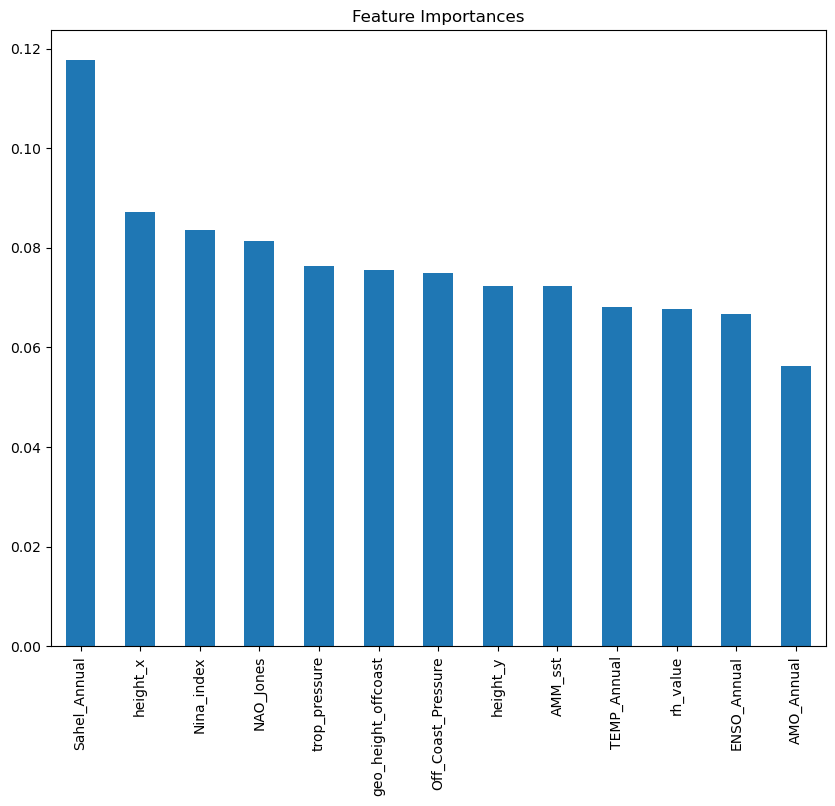

In [785]:
feature_importances = pd.Series(best_rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

In [786]:
low_importance_features = feature_importances.tail(5).index.tolist()
low_importance_features

['AMM_sst', 'TEMP_Annual', 'rh_value', 'ENSO_Annual', 'AMO_Annual']

In [787]:
new_data = X.columns
new_data

Index(['Sahel_Annual', 'AMO_Annual', 'ENSO_Annual', 'TEMP_Annual', 'AMM_sst',
       'Nina_index', 'NAO_Jones', 'rh_value', 'height_x', 'trop_pressure',
       'Off_Coast_Pressure', 'height_y', 'geo_height_offcoast'],
      dtype='object')

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [788]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming df_cleaned and y are already defined

# Drop the specified columns and select important features

X_important_features = X

# Split the data into training and testing sets
X_train_important, X_test_important, y_train_important, y_test_important = train_test_split(X_important_features, y, test_size=0.20, random_state=42)

# Scale the selected important features
scaler = StandardScaler()
X_train_important_scaled = scaler.fit_transform(X_train_important)
X_test_important_scaled = scaler.transform(X_test_important)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the Random Forest model and the parameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Train the model on the training data
grid_search.fit(X_train_important_scaled, y_train_important)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train_important_scaled, y_train_important)

# Make predictions on the test data
y_pred_rf_best = best_rf_model.predict(X_test_important_scaled)

# Calculate accuracy
accuracy_rf_best = accuracy_score(y_test_important, y_pred_rf_best)

# Generate classification report
report_rf_best = classification_report(y_test_important, y_pred_rf_best)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy_rf_best)
print("Classification Report:\n", report_rf_best)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total

In [789]:
X

,Sahel_Annual,AMO_Annual,ENSO_Annual,TEMP_Annual,AMM_sst,Nina_index,NAO_Jones,rh_value,height_x,trop_pressure,Off_Coast_Pressure,height_y,geo_height_offcoast
0,2.122619,-0.093041,-1.656824,-0.176712,0.349037,1.350707,0.562304,2.481119,-1.060883,0.244085,0.793543,-1.060883,-1.078952
1,0.573459,0.997485,-0.394250,0.921658,0.617199,1.060528,0.697718,0.770031,-0.086065,0.550971,-0.339514,-0.086065,0.384326
2,1.851323,1.468913,0.512214,-0.013125,1.194946,-0.000773,-1.080330,1.814058,-0.542208,-0.017198,-0.337712,-0.542208,-0.209265
3,1.589276,1.307896,0.771204,-0.737583,0.573596,0.993357,1.672113,1.306788,-0.200081,0.737678,0.352209,-0.200081,-0.367281
4,2.019341,0.162692,0.317972,0.220570,-0.352980,-1.027145,1.660338,1.351020,-2.192378,-0.583757,-0.125602,-2.192378,-1.867306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,-0.051447,0.202731,-0.944603,2.066768,-1.458330,0.372698,1.513148,0.379916,0.287520,-0.024709,0.625116,0.287520,0.953995
69,-0.051447,0.748210,0.933072,2.697746,0.260740,0.332395,-0.986129,0.817251,0.646833,-2.618755,-1.602719,0.646833,1.901295
70,0.026859,1.415097,0.544588,2.043398,0.529992,-0.943853,-0.447416,0.848931,-0.315249,-3.454108,-3.159546,-0.315249,1.591376
71,0.026859,1.179598,-1.074098,0.945028,-0.918736,-0.785330,-0.862490,0.254194,0.368850,-1.092909,-1.133464,0.368850,1.966017


In [790]:
# dump(X, 'joblib_files/X_df.joblib')
# dump(X_train, 'joblib_files/X_train_set.joblib')
# dump(y_train, 'joblib_files/y_train_set.joblib')
# dump(rf_classifier, 'models/rf_model.joblib')

['models/rf_model.joblib']